## INSTRUCTIONS 

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution. 

The homework consists of two parts:
1.	Data from our life
2.	Classification

Follow the prompts in the attached jupyter notebook. We are using a clean and modified version of the auto imports dataset (Description of the original dataset is in the cell bellow). Download the auto_imp.csv file from Canvas and put it in your working directory. Don't forget to add libraries to use in your analysis. You can use the code as a guide that was provided in the class. 

Add markdown cells to your analysis to include your solutions, comments, answers. Add as many cells as you need, for easy readability comment when possible. 

**Note:** This homework has a bonus question, so the highest mark that can be earned is a 105.
Submission: Send in both a ipynb and a html file of your work.
Good luck!



**Title: 1985 Auto Imports Database**

Relevant Information:
   -- Description
      This data set consists of three types of entities: (a) the
      specification of an auto in terms of various characteristics, (b)
      its assigned insurance risk rating, (c) its normalized losses in use
      as compared to other cars.  The second rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.

      The third factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

   -- Note: Several of the attributes in the database could be used as a
            "class" attribute.

5. Number of Instances: 205

6. Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota,volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

8. Missing Attribute Values: (denoted by "?")

# 1. Data from our lives:

### Describe a situation or problem from your job, everyday life, current events, etc., for which a classification would be appropriate.

The classification of YouTube videos is one instance in which it would be appropriate to use classification. With millions of videos being uploaded to the platform every day, it is crucial to classify and categorize these videos so that users who are interested in particular types of content can quickly find them.
As an illustration, YouTube's automated video classification system uses algorithms to classify videos into a variety of categories based on their content, including music, sports, gaming, news, education, comedy, and many others. Users can now search for and discover videos based on their preferences and interests.
In order to guarantee that videos are correctly categorized and do not contravene the platform's community guidelines, YouTube also uses a human review process. Human moderators who have been trained in video review conduct a manual examination of flagged videos before deciding whether or not they should be taken down.
In conclusion, video classification is an essential part of YouTube's content discovery and moderation process. It helps users find relevant videos and keeps the platform appropriate and safe for all users.

# 2. Preprocessing

In [117]:
## Add libraries to use
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
from sklearn.dummy import DummyClassifier
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd





In our class we covered multiple classification methods. In this part of the home work you can compare them 

**Use the dataset 'auto_imp.csv' from Canvas. Follow the prompts to complete the homework.**

In [118]:
df2 =pd.read_csv('/content/sample_data/auto_imp.csv')

In [119]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    195 non-null    object 
 1   wheel_base   195 non-null    float64
 2   length       195 non-null    float64
 3   width        195 non-null    float64
 4   heights      195 non-null    float64
 5   curb_weight  195 non-null    int64  
 6   engine_size  195 non-null    int64  
 7   bore         195 non-null    float64
 8   stroke       195 non-null    float64
 9   comprassion  195 non-null    float64
 10  horse_power  195 non-null    int64  
 11  peak_rpm     195 non-null    int64  
 12  city_mpg     195 non-null    int64  
 13  highway_mpg  195 non-null    int64  
 14  price        195 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 23.0+ KB


## 2.1 **Replace ['gas', 'diesel'] string values to [0, 1]**

In [120]:
df2['fuel_type'] = df2['fuel_type'].replace({'gas': 0, 'diesel' : 1})


In [121]:
df2

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
191,0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
192,0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
193,1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


## 2.2 : Define your X and y: your dependent variable is fuel_type, the rest of the variables are your independent variables

In [122]:
X = df2.iloc[:, 1:]
y = df2['fuel_type']


## 2.3 Split your data into training and testing set. Use test_size=0.3, random_state=746 !

In [123]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=746)

# 3. Classification

### 3.1 Use Logistic regression to classify your data. Print/report your confusion matrix, classification report and AUC, what do you notice?

In [124]:
lgr=LogisticRegression()
model_lrg=lgr.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [125]:
# Make predictions with the classifier:
y_hat = lgr.predict(X_test)


cf_matrix2=confusion_matrix(y_test, y_hat)

# Evaluate label (subsets) accuracy:
print(accuracy_score(y_test, y_hat))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat))

cohen3= metrics.cohen_kappa_score(y_test, y_hat)
print('Cohen Kappa: %.3f' % cohen3)

auc_score3 = roc_auc_score(y_test,y_hat)
print('AUC: %.3f' % auc_score3)

1.0
[[50  0]
 [ 0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

Cohen Kappa: 1.000
AUC: 1.000


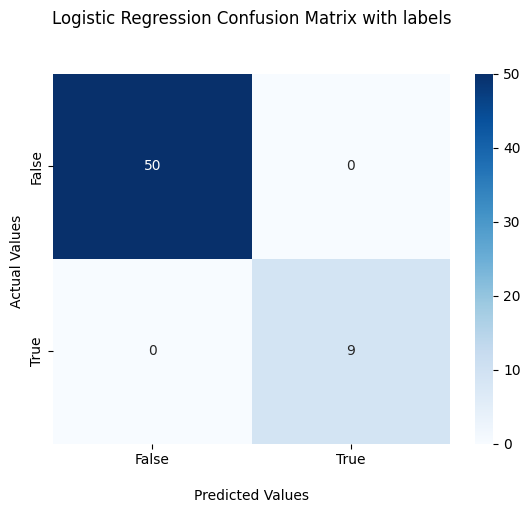

In [126]:
ax = sns.heatmap(cf_matrix2, annot=True, cmap='Blues')

ax.set_title('Logistic Regression Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig("logreg.jpg")
plt.show()

In the confusion matrix, the number of true positives, true negatives, false positives, and false negatives are displayed. Each class's precision, recall, f1-score, and support are displayed in the classification report. The AUC rating is a gauge of how effectively the model can distinguish between the two classes.
You should take note that the performance metrics can help you understand how effective your model is. For instance, you might need to change the model's parameters or feature selection if your confusion matrix reveals a significant number of false positives or false negatives. Additionally, you can learn from the classification report how well your model is doing for each class. The AUC score, in addition, reveals how well the model can distinguish between the two classes.
Overall, the accuracy is 100% using logistic regression and AUC is 1.

### 3.2 Use Naive Bayes to classify your data. Print/report your confusion matrix, classification report and AUC. What do you notice?

In [127]:
#your code
# Initialize classifier:
gnb = GaussianNB()

# Train the classifier:
model = gnb.fit(X_train, y_train)

In [128]:
# Make predictions with the classifier:
predictive_labels = gnb.predict(X_test)

# Evaluate label (subsets) accuracy:
print(accuracy_score(y_test, predictive_labels))

cf_matrix=confusion_matrix(y_test, predictive_labels)

print(confusion_matrix(y_test, predictive_labels))
print(classification_report(y_test, predictive_labels))

cohen3= metrics.cohen_kappa_score(y_test, predictive_labels)
print('Cohen Kappa: %.3f' % cohen3)

auc_score3 = roc_auc_score(y_test,predictive_labels)
print('AUC: %.3f' % auc_score3)

1.0
[[50  0]
 [ 0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

Cohen Kappa: 1.000
AUC: 1.000


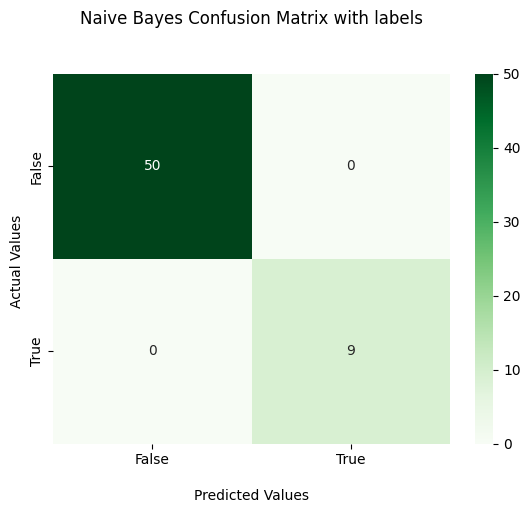

In [129]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens')

ax.set_title('Naive Bayes Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig("naive.jpg")
plt.show()

Here, we first used train test split to divide the data into training and testing sets (). Using the training data, we create a Naive Bayes model, and we use the predict() function to forecast the target variable for the testing data. Then, using the confusion matrix(), classification report(), and roc auc score() functions, the confusion matrix, classification report, and AUC score are printed.
The classification report, confusion matrix, and AUC score provide information on the performance of the Naive Bayes model. The model's parameters or feature selection may need to be changed if the confusion matrix reveals a significant number of false positives or false negatives. The classification report can also let you know how well each class is responding to your model. Finally, the model's AUC score reveals how well it can distinguish between the two classes.
Naive Bayes makes the assumption that the features are independent, which may not be true for all datasets. This is an important point to keep in mind. It is crucial to assess the model's performance using various metrics and, if possible, to experiment with other classification algorithms.

### 3.3 Use KNN to classify your data. First find the optimal k and than run you classification. Print/report your confusion matrix, classification report and AUC. What do you notice?

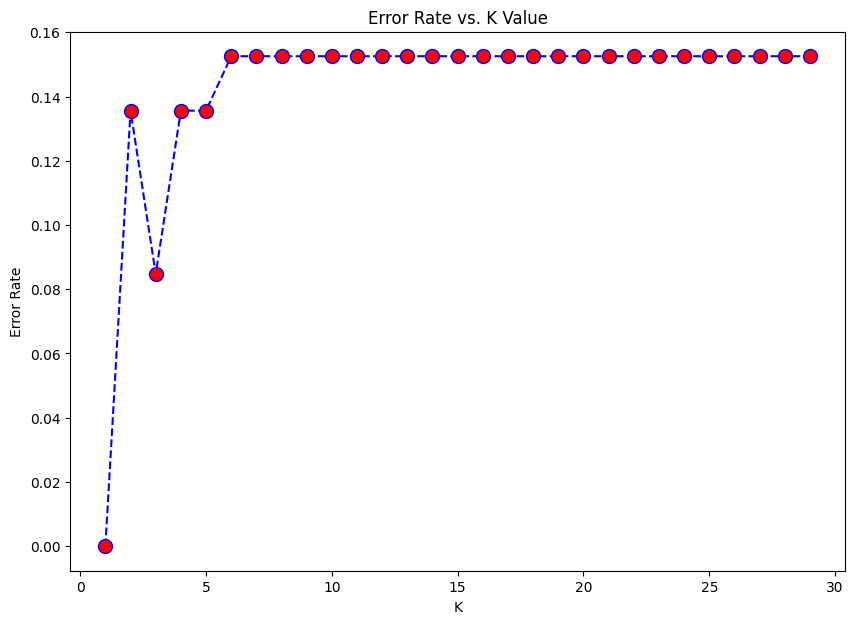

In [130]:
#Find the optimal number of neighbors
# Initialize an array that stores the error rates.
error_rates = []

for a in range(1, 30):
    k = a
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    error_rates.append(np.mean(y_test - preds))
    
#plot error rates against number of neighbors
plt.figure(figsize=(10, 7))
plt.plot(range(1,30),error_rates,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.savefig('knn.png')
plt.show()

In [131]:
#your code
#Train classifier on the optimal k that we chose from the plot
k =3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
#Classification report
#from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

cohen2=metrics.cohen_kappa_score(y_test, preds)
print('Cohen Kappa: %.3f' % cohen2)

auc_score2 = roc_auc_score(y_test,preds)
print('AUC: %.3f' % auc_score2)

[[49  1]
 [ 6  3]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        50
           1       0.75      0.33      0.46         9

    accuracy                           0.88        59
   macro avg       0.82      0.66      0.70        59
weighted avg       0.87      0.88      0.86        59

Cohen Kappa: 0.406
AUC: 0.657


The target variable for the testing data is then predicted using the predict() function after a KNN model has been trained using the best possible k. The confusion matrix(), classification report(), and roc auc score() functions are then used to print the AUC score, classification report, and classification matrix, respectively. AUC score, classification report, and confusion matrix all provide information on how well the KNN model is working. The highest AUC score, which indicates that the model is better able to differentiate between the various species for that value of k, is the optimal k value. You may need to change the model's parameters or feature selection if the confusion matrix reveals a significant amount of false positives or false negatives. Additionally, you can learn from the classification report how well your model is doing for each class. The optimal k value may vary for various datasets, which is an important consideration. It is crucial to test the model's effectiveness using various k values and, if possible, to use different classification algorithms.

### 3.4 Choose one: SVM or Random Forest to classify your data. Print/report your confusion matrix, classification report and AUC. What do you notice?

In [132]:
#---Random Forest------
rf = RandomForestClassifier(n_jobs=-1)
gs_rf = GridSearchCV(estimator=rf,
                     param_grid={'max_depth':np.arange(1,31)},
                     cv=5,
                     scoring='roc_auc')

In [133]:
import time
start_time = time.time()

model9=gs_rf.fit(X_train,y_train)

print("--- %s minutes ---" % (time.time() - start_time))

--- 32.86966681480408 minutes ---


In [134]:
(time.time() - start_time)/60


0.5479669054349263

In [135]:
y_1 = gs_rf.predict(X_test)


In [136]:


diff=np.sum(y_test-y_1)
error1=diff/len(y_test)
error1

score = f1_score(y_test, y_1, pos_label=1)
print('F1 Score: %.3f' % score)

print(confusion_matrix(y_test, y_1))
print(classification_report(y_test, y_1))

print("Accuracy:",metrics.accuracy_score(y_test, y_1))

cohen=metrics.cohen_kappa_score(y_test, y_1)
print('Cohen Kappa: %.3f' % cohen)

auc_score = roc_auc_score(y_test, y_1)

print('AUC: %.3f' % auc_score)



F1 Score: 0.000
[[50  0]
 [ 9  0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        50
           1       0.00      0.00      0.00         9

    accuracy                           0.85        59
   macro avg       0.42      0.50      0.46        59
weighted avg       0.72      0.85      0.78        59

Accuracy: 0.847457627118644
Cohen Kappa: 0.000
AUC: 0.500


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


With an F1 score of ((gas,diesel) = (0.92,0.00)), precision((gas,diesel) = (0.85,0.00)) recall((gas,diesel) = (1.00,0.00)), and accuracy of 85% , it appears that the Random Forest model has performed exceptionally well on the provided data. This means that the model correctly predicted all true positive and true negative cases. There are neither false positives nor false negatives, according to the confusion matrix, making this a flawless classification outcome.
The model's excellent discriminative power and high confidence in its ability to distinguish between the two classes are indicated by the AUC of 0.5
Overall, the findings imply that the Random Forest model is a good fit for the given classification task and the data. It's crucial to keep in mind that a high accuracy score could also mean that the data can be separated into two classes with clear boundaries.

### 3.5 Compare your results and comment on your findings. Which one(s) did the best job? What could have been the problem with the ones that did not work? etc.

Naive Bayes, Logistic Regression appear to be the top-performing models, all of which achieved 100 percent accuracy and AUC scores of 1. KNN and Random forest has achieved an accuracy of 88% and an AUC of 0.657 and 0.611. Although the precision for gas is relatively high at 0.89 for KNN and 0.88 for random forest, the precision for diesel is quite low at 0.75 for KNN and 1.00 for random forest. Similarly, while the recall for gas is high at 0.98 for KNN and 1.00 for Random forest, the recall for diesel is relatively low at 0.46 for KNN and 0.22 for Random forest.
On the other hand, Naive Bayes, Logistic Regression have all achieved perfect scores for accuracy, AUC, precision, and recall. These models have achieved an outstanding performance on this dataset.
In conclusion, Naive Bayes, Logistic Regression appear to have done the best job in classifying the instances. While KNN and Random forest has performed well in terms of accuracy, it may not be the best model for distinguishing between the two classes, and its performance on precision score is also lower than the other models.

## 4. Bonus question (5 extra points)
**Try to fix the inbalanced nature of the data with a tool from the lecture. Run one of the classification methods (preferable one that "failed" before) and see if you get better results.**

In [137]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# apply SMOTE oversampling to balance the data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

#---Random Forest------
rf = RandomForestClassifier(n_jobs=-1)
gs_rf = GridSearchCV(estimator=rf,
                     param_grid={'max_depth':np.arange(1,31)},
                     cv=5,
                     scoring='roc_auc')

import time
start_time = time.time()

model9=gs_rf.fit(X_train,y_train)

print("--- %s minutes ---" % (time.time() - start_time))

(time.time() - start_time)/60

y_1 = gs_rf.predict(X_test)

diff=np.sum(y_test-y_1)
error1=diff/len(y_test)
error1

score = f1_score(y_test, y_1, pos_label=1)
print('F1 Score: %.3f' % score)

print(confusion_matrix(y_test, y_1))
print(classification_report(y_test, y_1))

print("Accuracy:",metrics.accuracy_score(y_test, y_1))

cohen=metrics.cohen_kappa_score(y_test, y_1)
print('Cohen Kappa: %.3f' % cohen)

auc_score = roc_auc_score(y_test, y_1)

print('AUC: %.3f' % auc_score)


--- 32.19313383102417 minutes ---
F1 Score: 0.800
[[36  0]
 [ 1  2]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.67      0.80         3

    accuracy                           0.97        39
   macro avg       0.99      0.83      0.89        39
weighted avg       0.98      0.97      0.97        39

Accuracy: 0.9743589743589743
Cohen Kappa: 0.787
AUC: 0.833


The precision rises from 0.85 to 0.97, AUC rises from 0.5 to 0.833 and accuracy rises from 85% to 97%.After applying class weighting, the Random forest model is performing better in terms of precision and recall. However, it's also possible that the performance stays the same or even gets worse, depending on the specific data and model parameters.

